# Preprocessing data

In [2]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
plt.style.use('ggplot')

In [4]:
# Originally command was the following but use the one uncommented 
# below instead (works in Ubuntu)
#!open .
#!xdg-open .

In [5]:
%matplotlib inline
from libs import utils

In [6]:
files = utils.get_celeb_files()

In [7]:
img = plt.imread(files[50])

In [8]:
print(img)

[[[127 116 114]
  [127 116 114]
  [127 116 114]
  ..., 
  [201 196 203]
  [201 196 203]
  [201 196 203]]

 [[127 116 114]
  [127 116 114]
  [127 116 114]
  ..., 
  [201 196 203]
  [201 196 203]
  [201 196 203]]

 [[127 116 114]
  [127 116 114]
  [127 116 114]
  ..., 
  [201 196 203]
  [201 196 203]
  [201 196 203]]

 ..., 
 [[159 148 152]
  [159 148 152]
  [159 148 152]
  ..., 
  [198 194 208]
  [197 193 207]
  [197 193 207]]

 [[158 149 152]
  [158 149 152]
  [158 149 152]
  ..., 
  [201 197 211]
  [200 196 210]
  [200 196 210]]

 [[158 149 152]
  [158 149 152]
  [158 149 152]
  ..., 
  [201 197 211]
  [200 196 210]
  [200 196 210]]]


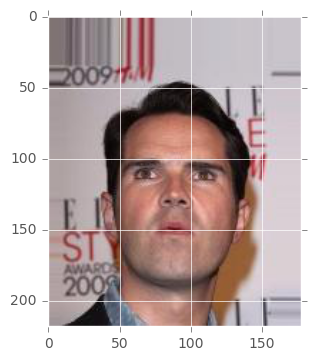

In [9]:
plt.imshow(img)

In [10]:
img.shape

(218, 178, 3)

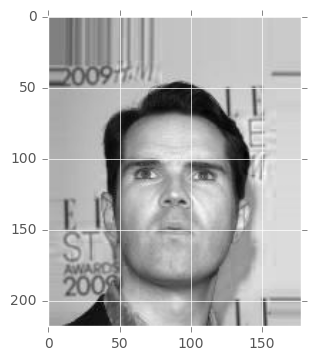

In [11]:
plt.imshow(img[:,:,0],cmap='gray')

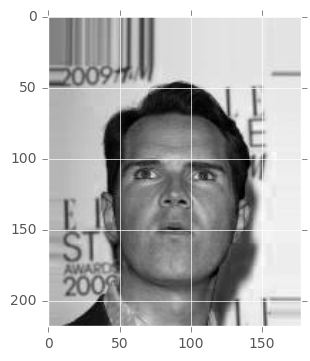

In [12]:
plt.imshow(img[:,:,2],cmap='gray')

Lets load 100 of the image files as a Python array 

In [13]:
imgs = utils.get_celeb_imgs()

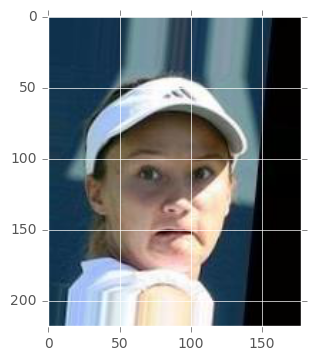

In [14]:
plt.imshow(imgs[0])

Lets convert the cell to a Numpy Array so we run math on the dataset

In [15]:
data = np.array(imgs)

In [16]:
data.shape

(100, 218, 178, 3)

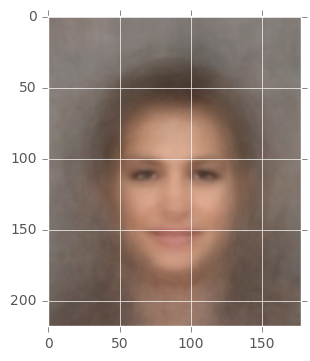

In [17]:
# Compute the average pixel value
mean_img = np.mean(data,axis=0)
plt.imshow(mean_img.astype(np.uint8))

(218, 178, 3)

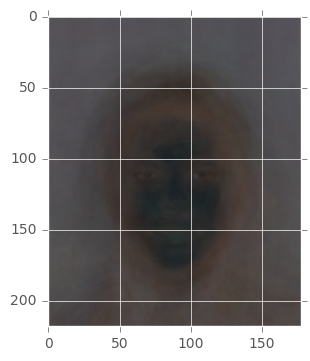

In [18]:
# Compute the standard deviation on the pixel 
# value (brighter means greater variance)
std_img = np.std(data,axis=0)
plt.imshow((std_img).astype(np.uint8))
std_img.shape

(218, 178)


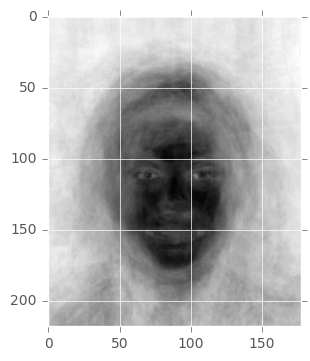

In [19]:
avg_std_img = np.mean(std_img, axis=2)
print(avg_std_img.shape)
plt.imshow(avg_std_img.astype(np.uint8),cmap='gray')

In [20]:
flattened = data.ravel()

In [21]:
print(data)

[[[[ 15  49  76]
   [ 15  49  76]
   [ 15  49  76]
   ..., 
   [  2   1   0]
   [  2   1   0]
   [  2   1   0]]

  [[ 15  49  76]
   [ 15  49  76]
   [ 15  49  76]
   ..., 
   [  2   1   0]
   [  2   1   0]
   [  2   1   0]]

  [[ 15  49  76]
   [ 15  49  76]
   [ 15  49  76]
   ..., 
   [  2   1   0]
   [  2   1   0]
   [  2   1   0]]

  ..., 
  [[ 16  51  73]
   [ 19  54  76]
   [ 19  54  74]
   ..., 
   [  2   1   0]
   [  2   1   0]
   [  2   1   0]]

  [[ 19  54  76]
   [ 15  50  72]
   [ 20  55  75]
   ..., 
   [  2   1   0]
   [  2   1   0]
   [  2   1   0]]

  [[ 19  54  76]
   [ 15  50  72]
   [ 20  55  75]
   ..., 
   [  2   1   0]
   [  2   1   0]
   [  2   1   0]]]


 [[[ 43  39  30]
   [ 33  30  23]
   [ 19  19  11]
   ..., 
   [ 24  31  24]
   [ 24  31  24]
   [ 24  31  24]]

  [[ 43  39  30]
   [ 33  30  23]
   [ 20  20  12]
   ..., 
   [ 24  31  24]
   [ 24  31  24]
   [ 24  31  24]]

  [[ 44  40  31]
   [ 34  31  24]
   [ 20  20  12]
   ..., 
   [ 24  31  24]
   [ 24  

In [22]:
flattened[:10]

array([15, 49, 76, 15, 49, 76, 15, 49, 76, 15], dtype=uint8)

(array([ 216804.,  117821.,   99125.,   71049.,   66478.,   62066.,
          62528.,   58085.,   56686.,   56114.,   56848.,   58551.,
          63168.,   61086.,   59193.,   59305.,   62527.,   63595.,
          62285.,   65061.,   63389.,   61989.,   61411.,   60742.,
          60464.,   60307.,   59074.,   59312.,   60353.,   64807.,
          67305.,   61667.,   59906.,   60546.,   62017.,   62268.,
          63030.,   62799.,   62395.,   62610.,   59541.,   58918.,
          57822.,   61451.,   63480.,   57783.,   57212.,   56516.,
          56037.,   58382.,   56254.,   55091.,   54677.,   52065.,
          51014.,   48826.,   47602.,   46064.,   45351.,   43735.,
          42849.,   42903.,   42571.,   41789.,   42412.,   42705.,
          42981.,   43107.,   43373.,   43416.,   43323.,   42808.,
          42253.,   42302.,   42009.,   41845.,   42801.,   42475.,
          42435.,   42405.,   42584.,   42612.,   42671.,   42344.,
          42610.,   42023.,   42214.,   41700., 

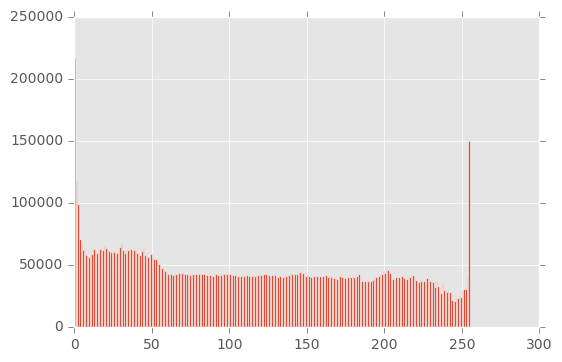

In [23]:
plt.hist(flattened, 255)

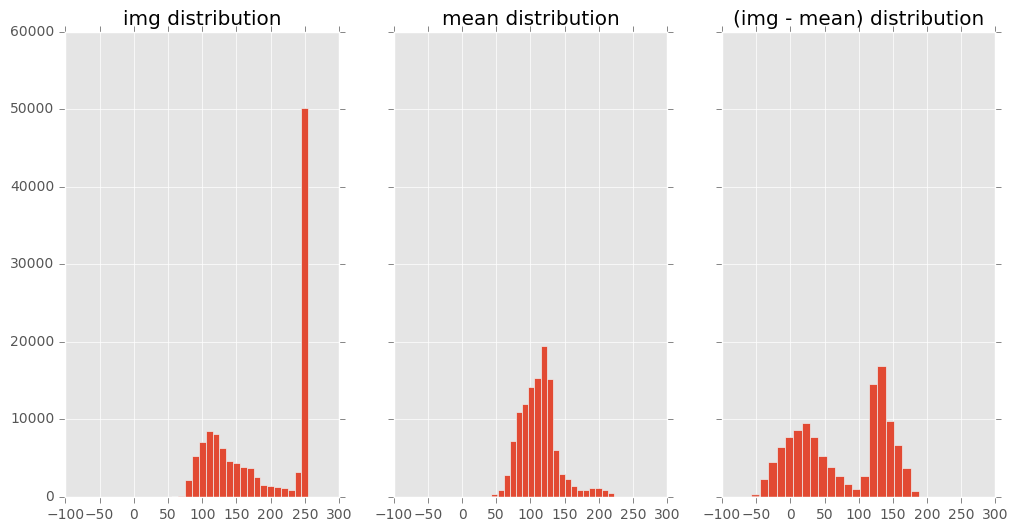

In [24]:
# ploting histogram for pixel value distribution for one image
# and comparing to statisical values (mean and std)
bins = 20
selected_img = data[10]
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((selected_img).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((selected_img - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

(100, 218, 178, 3)


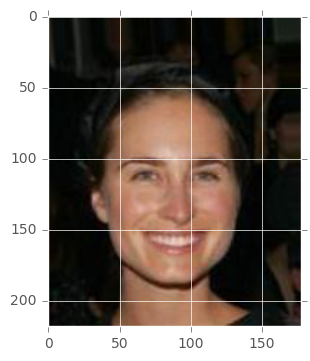

In [25]:
print(data.shape)
plt.imshow(data[1])

# Playing with Tensorflow

In [26]:
# Numpy array
x = np.linspace(-3.0, 3.0, 100 )
print(x.shape)
print(x.dtype)

(100,)
float64


In [27]:
# Playing with Tensorflow
import tensorflow as tf
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)


In [28]:
g = tf.get_default_graph()

In [29]:
[op.name for op in g.get_operations()]

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace']

In [30]:
g.get_tensor_by_name('LinSpace'+':0')

<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

In [31]:
sess = tf.Session()

In [32]:
computed_x = sess.run(x)
print(computed_x)

[-3.         -2.939394   -2.87878799 -2.81818175 -2.75757575 -2.69696975
 -2.63636351 -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.33333325
 -2.27272725 -2.21212125 -2.15151501 -2.090909   -2.030303   -1.969697
 -1.90909088 -1.84848475 -1.78787875 -1.72727275 -1.66666663 -1.6060605
 -1.5454545  -1.4848485  -1.42424238 -1.36363626 -1.30303025 -1.24242425
 -1.18181813 -1.12121201 -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.69696951 -0.63636351 -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.15151501
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.27272749  0.33333349  0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.75757599  0.81818199  0.87878799  0.939394    1.
  1.060606    1.12121201  1.18181849  1.24242449  1.30303049  1.36363649
  1.4242425   1.4848485   1.5454545   1.60606098  1.66666698  1.72727299
  1.78787899  1.84848499  1.909091    1.969697    2

In [33]:
sess.close()

In [34]:
sess = tf.InteractiveSession()

In [35]:
x.eval()

array([-3.        , -2.939394  , -2.87878799, -2.81818175, -2.75757575,
       -2.69696975, -2.63636351, -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.33333325, -2.27272725, -2.21212125, -2.15151501,
       -2.090909  , -2.030303  , -1.969697  , -1.90909088, -1.84848475,
       -1.78787875, -1.72727275, -1.66666663, -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.42424238, -1.36363626, -1.30303025, -1.24242425,
       -1.18181813, -1.12121201, -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.69696951, -0.63636351,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.15151501, -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.27272749,
        0.33333349,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.75757599,  0.81818199,  0.87878799,
        0.939394  ,  1.        ,  1.060606  ,  1.12121201,  1.18

In [36]:
# Playing with Gaussian Kernel
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))


(512, 512)


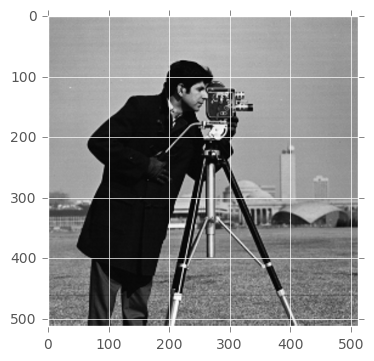

In [37]:
# Let's first load an image.  We're going to need a grayscale image to begin with.  skimage has some images we can play with.  If you do not have the skimage module, you can load your own image, or get skimage by pip installing "scikit-image".
from skimage import data
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

In [39]:
img_4d = img.reshape([1, img.shape[0], img.shape[1], 1])
print(img_4d.shape)

(1, 512, 512, 1)


In [40]:
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
print(img_4d)

Tensor("Reshape:0", shape=(1, 512, 512, 1), dtype=float32)


In [43]:
img_4d.get_shape().as_list()

[1, 512, 512, 1]

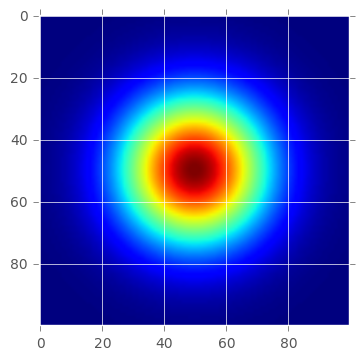

In [44]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())

In [45]:
z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])

In [46]:
z_4d.get_shape().as_list()

[100, 100, 1, 1]

In [47]:
convolved = tf.nn.conv2d(img_4d, z_4d, strides =[1, 1, 1, 1], padding='SAME' )

In [48]:
print(convolved)

Tensor("Conv2D:0", shape=(1, 512, 512, 1), dtype=float32)


In [49]:
res = convolved.eval()

In [52]:
res.shape

(1, 512, 512, 1)

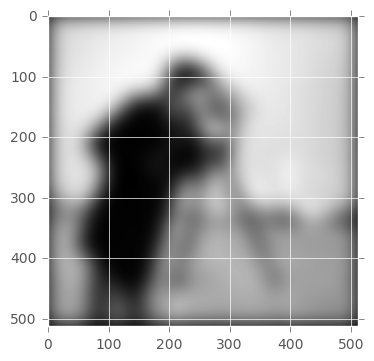

In [55]:
plt.imshow(res.squeeze(), cmap='gray')

In [56]:
xs = tf.linspace(-3.0, 3.0, ksize)

In [58]:
ys = tf.sin(xs)

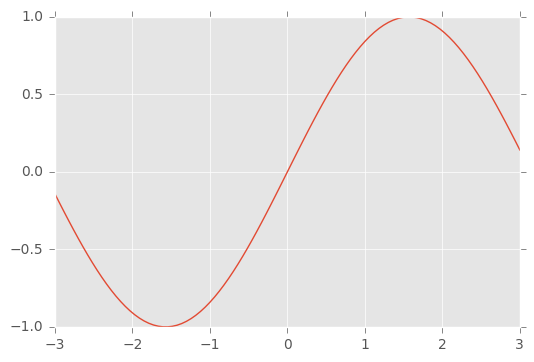

In [61]:
plt.plot(xs.eval(),ys.eval())

In [63]:
ys = tf.reshape(ys, [ksize, 1])

In [64]:
ones = tf.ones((1,ksize))

In [66]:
wave = tf.matmul(ys, ones)

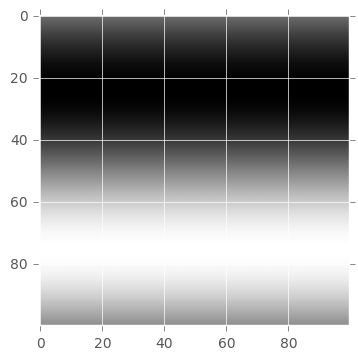

In [67]:
plt.imshow(wave.eval(),cmap='gray')

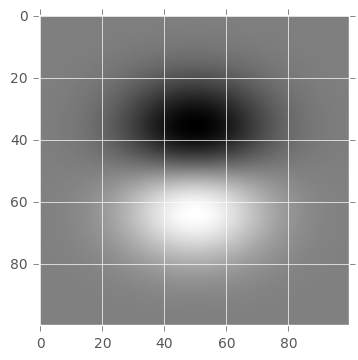

In [68]:
gabor = tf.mul(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')

In [69]:
img = tf.placeholder(tf.float32, shape=[None, None], name='img')

In [70]:
img_3d = tf.expand_dims(img,2)
dims = img_3d.get_shape()

In [71]:
img_4d = tf.expand_dims(img_3d, 0)

In [72]:
print(img_4d.get_shape())

(1, ?, ?, 1)


In [76]:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

In [77]:
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

In [85]:
# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(
    tf.reshape(z, tf.pack([ksize, 1])), 
    tf.reshape(z,  tf.pack([1, ksize])))


In [93]:
ys = tf.sin(x)
ys = tf.reshape(ys,  tf.pack([ksize, 1]))
ones = tf.ones( tf.pack([1,ksize]))

In [94]:
wave = tf.matmul(ys, ones)

In [95]:
gabor = tf.mul(wave, z_2d)

In [96]:
gabor_4d = tf.reshape(gabor, tf.pack([ksize, ksize, 1, 1]))

In [97]:
# And finally, convolve the two:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides =[1, 1, 1, 1], padding='SAME') 
convolved_img = convolved[0, :, :, 0]


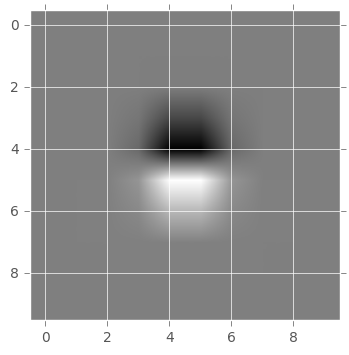

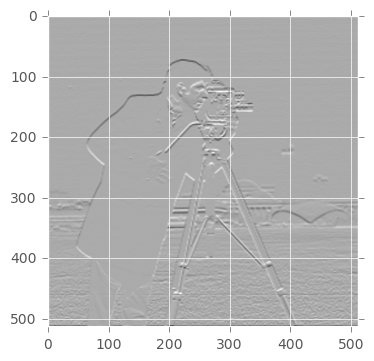

In [121]:
mean_val=0.0
sigma_val = 0.5
ksize_val=10
gabor_res=gabor.eval(feed_dict={mean:mean_val, 
                                sigma:sigma_val, ksize:ksize_val})
plt.imshow(gabor_res, cmap='gray')
figure()
res = convolved_img.eval(feed_dict={
    img: data.camera(), mean:mean_val, 
                                sigma:sigma_val, ksize:ksize_val})
plt.imshow(res, cmap='gray')